<a href="https://colab.research.google.com/github/enzotancara/lab2_TancaraEnzo/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:
from sklearn.datasets import make_blobs
import numpy as np
n_centers = np.random.randint(1, 21)
blob_centers = np.random.uniform(0, 50, size=(n_centers, 2))
# blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
#blob_std = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1])


In [211]:
blob_std = np.random.uniform(0.1, 0.2, size=n_centers)

In [218]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=42)
print(f"Cantidad de centros generados: {n_centers}")
print(f"Coordenadas de los centros: \n{blob_centers}")
print(f"desviacion estandar: \n{blob_std}")

Cantidad de centros generados: 9
Coordenadas de los centros: 
[[29.4882597  32.9619065 ]
 [15.16344175 13.50072596]
 [39.59318822  4.67977771]
 [ 6.33211493 47.42796121]
 [16.33129448 49.33118469]
 [38.15149459 17.9898808 ]
 [29.50701603 30.47504071]
 [ 8.36958265 39.40492971]
 [11.55181279 11.73217188]]
desviacion estandar: 
[0.10353661 0.13026287 0.11407528 0.19680909 0.17423626 0.17290509
 0.14220414 0.10693805 0.10982416]


In [219]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

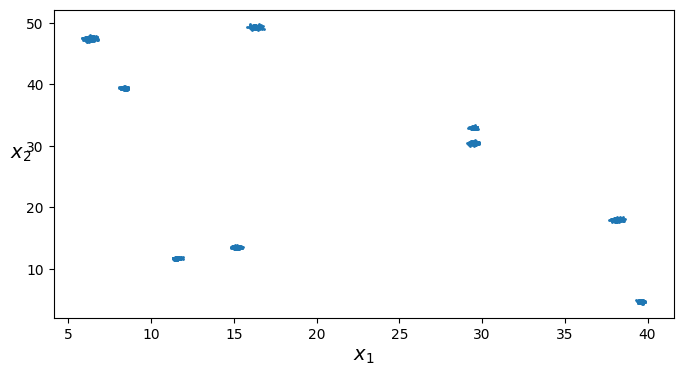

In [220]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [221]:
from sklearn.cluster import KMeans

k = n_centers
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

array([8, 7, 0, ..., 7, 6, 5], dtype=int32)

In [222]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

np.float64(0.9541785020843839)

In [223]:
kmeans.cluster_centers_

array([[ 6.34454663, 47.45054154],
       [38.1503026 , 17.99975969],
       [11.55368444, 11.72396751],
       [29.4882875 , 32.9659313 ],
       [39.60752429,  4.6859102 ],
       [16.31702254, 49.3362955 ],
       [ 8.3721854 , 39.40509747],
       [15.16257543, 13.50345106],
       [29.50214651, 30.47581976]])

In [224]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([2, 2, 2, 2], dtype=int32)

In [225]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

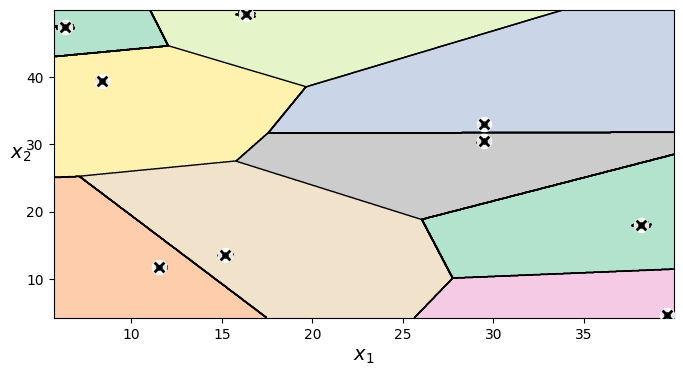

In [226]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [227]:
kmeans.transform(X_new)

array([[45.89123008, 41.36952862, 15.10109825, 42.76035548, 39.69848983,
        50.06965245, 38.33059881, 19.03242181, 41.00303598],
       [45.57343215, 38.62041018, 12.95071665, 40.74945737, 36.70592525,
        49.17385445, 37.78890965, 16.74089685, 38.90033523],
       [45.42214432, 43.79886065, 16.96812718, 44.19780383, 42.64086561,
        50.20159002, 38.13997539, 20.98098258, 42.55949012],
       [45.9115643 , 43.97260459, 17.23053416, 44.53831828, 42.66355974,
        50.6634576 , 38.6175196 , 21.23570299, 42.88398325]])

In [233]:


# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="full", max_iter=1, random_state=1)
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="lloyd", max_iter=1, random_state=1)
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=5,
#                      algorithm="elkan", max_iter=1, random_state=1)
# Configuración del modelo K-Means con inicialización inteligente
kmeans_iter1 = KMeans(n_clusters=9, init="k-means++", n_init=1,
                      algorithm="elkan", max_iter=3, random_state=42)
# kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="full", max_iter=2, random_state=1)
# kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=5,
#                      algorithm="elkan", max_iter=2, random_state=1)
kmeans_iter2 = KMeans(n_clusters=7, init="k-means++", n_init=1,
                     algorithm="elkan", max_iter=2, random_state=42)

# kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="full", max_iter=3, random_state=1)
# kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=5,
#                      algorithm="elkan", max_iter=3, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="k-means++", n_init=1,
                     algorithm="elkan", max_iter=3, random_state=42)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

print(f"Cantidad de centros generados: {n_centers}")

Cantidad de centros generados: 9


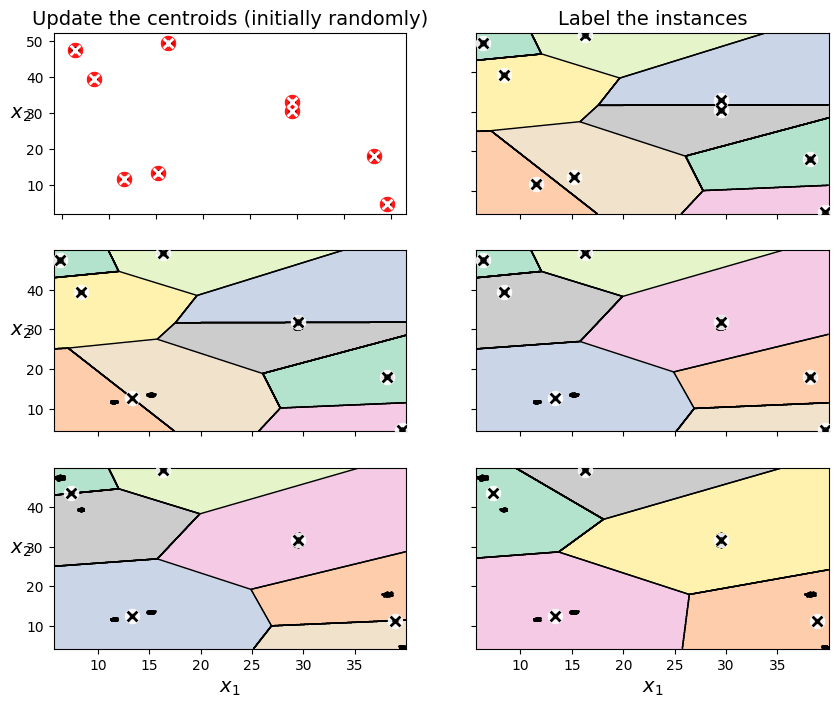

In [234]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

In [235]:
from sklearn.metrics import silhouette_score
silhouette_iter1 = silhouette_score(X, kmeans_iter1.labels_)
silhouette_iter2 = silhouette_score(X, kmeans_iter2.labels_)
silhouette_iter3 = silhouette_score(X, kmeans_iter3.labels_)
# Imprimir los Silhouette Scores
print(f"Silhouette Score Modelo 1: {silhouette_iter1:.4f}")
print(f"Silhouette Score Modelo 2: {silhouette_iter2:.4f}")
print(f"Silhouette Score Modelo 3: {silhouette_iter3:.4f}")

Silhouette Score Modelo 1: 0.9542
Silhouette Score Modelo 2: 0.9475
Silhouette Score Modelo 3: 0.8048
